In [27]:
import pandas as pd
import statsmodels.api as sm

In [28]:
train_data = pd.read_csv('train_data.csv')
train_data.head()

# Define predictors and response for the train dataset
X_train = sm.add_constant(train_data['LOG_RETURNS_HHI_scaled'])  # Add constant for intercept
y_train = train_data['LOG_RETURNS_HSI']

# Fit the OLS model on the train dataset
model_train = sm.OLS(y_train, X_train).fit()

# Print the summary of the OLS model fitted on train data
print(model_train.summary())

                            OLS Regression Results                            
Dep. Variable:        LOG_RETURNS_HSI   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                 6.170e+06
Date:                Mon, 16 Dec 2024   Prob (F-statistic):               0.00
Time:                        10:32:58   Log-Likelihood:             3.7999e+06
No. Observations:              512042   AIC:                        -7.600e+06
Df Residuals:                  512040   BIC:                        -7.600e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -6.09

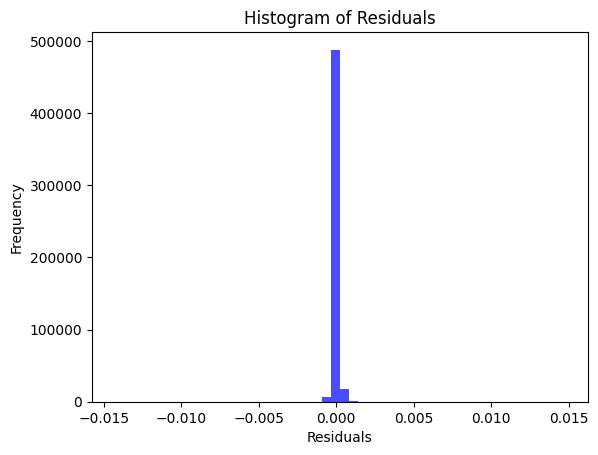

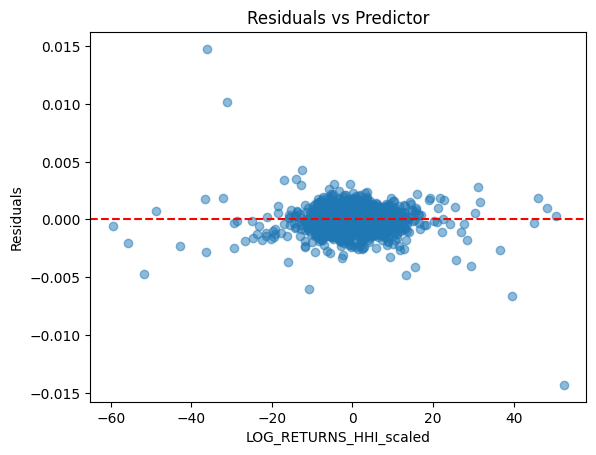

In [29]:
import matplotlib.pyplot as plt

# Residuals from the training model
residuals = model_train.resid

# Histogram of residuals
plt.hist(residuals, bins=50, color='blue', alpha=0.7)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Scatter plot of residuals
plt.scatter(train_data['LOG_RETURNS_HHI_scaled'], residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("LOG_RETURNS_HHI_scaled")
plt.ylabel("Residuals")
plt.title("Residuals vs Predictor")
plt.show()

In [4]:
train_data.to_csv('train_data.csv', index=False)
print("Updated train_data saved as 'train_data.csv'")

Updated train_data saved as 'train_data.csv'


# Strategy Checkpoint

In [94]:
import pandas as pd
import numpy as np

df = pd.read_csv('train_data.csv')
# Extract relevant columns
R_HSI = df['LOG_RETURNS_HSI']
R_HHI_scaled = df['LOG_RETURNS_HHI_scaled']

# Define regression coefficient
beta = 0.923


In [95]:
df.head()

,TIMESTAMP,MIC,FEEDCODE,LAST_PRICE_HSI,TURNOVER_VALUE,TURNOVER_VOLUME_HSI,LAST_BID_PRICE_HSI,LAST_ASK_PRICE_HSI,LAST_BID_VOLUME_HSI,LAST_ASK_VOLUME_HSI,...,LAST_ASK_PRICE_HHI,LAST_BID_VOLUME_HHI,LAST_ASK_VOLUME_HHI,MIDPOINT_HHI,MIDPOINT_HSI,LOG_RETURNS_HHI,LOG_RETURNS_HSI,predicted_HSI,LOG_RETURNS_HHI_scaled,predicted_RLM
0,2021-01-04 09:17:00+08:00,XHKF,HSIF1,27145.0,613282200.0,452.0,27145.0,27147.0,3.0,2.0,...,10662.0,3.0,3.0,10661.0,27146.0,0.000094,0.000184,0.000078,0.162590,0.000079
1,2021-01-04 09:18:00+08:00,XHKF,HSIF1,27140.0,502210600.0,370.0,27140.0,27143.0,2.0,2.0,...,10660.0,6.0,3.0,10659.0,27141.5,-0.000188,-0.000166,-0.000156,-0.320621,-0.000157
2,2021-01-04 09:19:00+08:00,XHKF,HSIF1,27133.0,397653950.0,293.0,27132.0,27135.0,3.0,4.0,...,10655.0,1.0,2.0,10654.5,27133.5,-0.000422,-0.000295,-0.000352,-0.723525,-0.000353
3,2021-01-04 09:20:00+08:00,XHKF,HSIF1,27127.0,644180250.0,475.0,27126.0,27128.0,1.0,3.0,...,10660.0,12.0,2.0,10659.0,27127.0,0.000422,-0.000240,0.000352,0.726574,0.000354
4,2021-01-04 09:21:00+08:00,XHKF,HSIF1,27132.0,424517350.0,313.0,27127.0,27130.0,2.0,2.0,...,10662.0,5.0,6.0,10661.0,27128.5,0.000188,0.000055,0.000157,0.323670,0.000157


In [96]:
import statsmodels.api as sm

# Perform linear regression
Y = df['LOG_RETURNS_HSI']
X = df['LOG_RETURNS_HHI_scaled']
X = sm.add_constant(X)  # Adds a constant term to the predictor
model = sm.OLS(Y, X).fit()
beta = model.params[1]
print(f"New Beta Value: {beta}")



New Beta Value: 0.0004846734770372416


C:\Users\subhransubhattacharj\AppData\Local\Temp\ipykernel_1028\2680496015.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = model.params[1]


In [97]:
# Define scaling factor
scale_factor = 1e6

# Rescale the log returns
df['LOG_RETURNS_HSI_rescaled'] = df['LOG_RETURNS_HSI'] * scale_factor
df['LOG_RETURNS_HHI_rescaled'] = df['LOG_RETURNS_HHI_scaled'] * scale_factor

print("LOG_RETURNS_HSI (rescaled):", df['LOG_RETURNS_HSI_rescaled'].describe())
print("LOG_RETURNS_HHI_scaled (rescaled):", df['LOG_RETURNS_HHI_rescaled'].describe())


LOG_RETURNS_HSI (rescaled): count    512042.000000
mean         -0.583079
std         523.183411
min      -29808.558669
25%        -200.330797
50%           0.000000
75%         198.381304
max       24788.495796
Name: LOG_RETURNS_HSI_rescaled, dtype: float64
LOG_RETURNS_HHI_scaled (rescaled): count    5.120420e+05
mean     5.389931e+01
std      1.037269e+06
min     -5.948791e+07
25%     -3.860250e+05
50%      1.524442e+03
75%      3.862301e+05
max      5.248907e+07
Name: LOG_RETURNS_HHI_rescaled, dtype: float64


In [98]:
# Standardize the series
df['LOG_RETURNS_HSI_normalized'] = (df['LOG_RETURNS_HSI'] - df['LOG_RETURNS_HSI'].mean()) / df['LOG_RETURNS_HSI'].std()
df['LOG_RETURNS_HHI_normalized'] = (df['LOG_RETURNS_HHI_scaled'] - df['LOG_RETURNS_HHI_scaled'].mean()) / df['LOG_RETURNS_HHI_scaled'].std()

# Verify statistics
print(df['LOG_RETURNS_HSI_normalized'].describe())
print(df['LOG_RETURNS_HHI_normalized'].describe())


count    5.120420e+05
mean     1.040749e-18
std      1.000000e+00
min     -5.697424e+01
25%     -3.817929e-01
50%      1.114483e-03
75%      3.802957e-01
max      4.738124e+01
Name: LOG_RETURNS_HSI_normalized, dtype: float64
count    5.120420e+05
mean     8.881056e-19
std      1.000000e+00
min     -5.735056e+01
25%     -3.722070e-01
50%      1.417706e-03
75%      3.723009e-01
max      5.060308e+01
Name: LOG_RETURNS_HHI_normalized, dtype: float64


In [100]:
correlation = df['LOG_RETURNS_HSI_normalized'].corr(df['LOG_RETURNS_HHI_normalized'])
print(f"Correlation between R_HSI and R_HHI_scaled: {correlation:.4f}")


Correlation between R_HSI and R_HHI_scaled: 0.9609


In [101]:
import statsmodels.api as sm

# Perform regression on normalized series
Y = df['LOG_RETURNS_HSI_normalized']
X = df['LOG_RETURNS_HHI_normalized']
X = sm.add_constant(X)  # Add intercept term
model = sm.OLS(Y, X).fit()

# Extract beta
beta = model.params[1]
print(f"Recalculated Beta (normalized data): {beta}")


Recalculated Beta (normalized data): 0.9609189077497362


C:\Users\subhransubhattacharj\AppData\Local\Temp\ipykernel_1028\3609375628.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = model.params[1]


In [102]:
# Calculate residuals
df['Residual_normalized'] = df['LOG_RETURNS_HSI_normalized'] - beta * df['LOG_RETURNS_HHI_normalized']

# Calculate Z-Scores
mean_residual = df['Residual_normalized'].mean()
std_residual = df['Residual_normalized'].std()
df['Z_Score'] = (df['Residual_normalized'] - mean_residual) / std_residual

print("Mean of Residuals:", mean_residual)
print("Standard Deviation of Residuals:", std_residual)


Mean of Residuals: -6.365912953037953e-19
Standard Deviation of Residuals: 0.2768300069164099


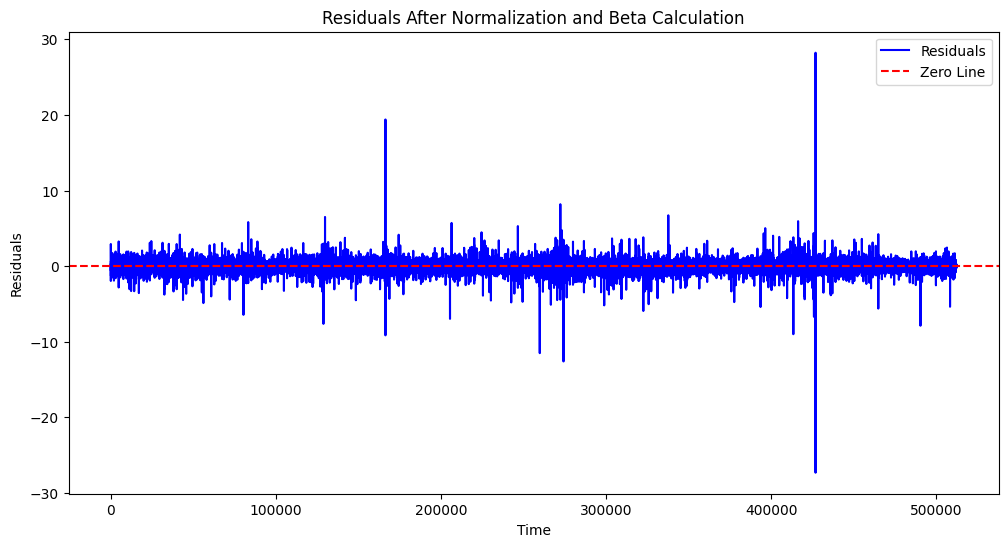

In [104]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Residual_normalized'], label='Residuals', color='blue')
plt.axhline(0, color='red', linestyle='--', label='Zero Line')
plt.title("Residuals After Normalization and Beta Calculation")
plt.xlabel("Time")
plt.ylabel("Residuals")
plt.legend()
plt.show()

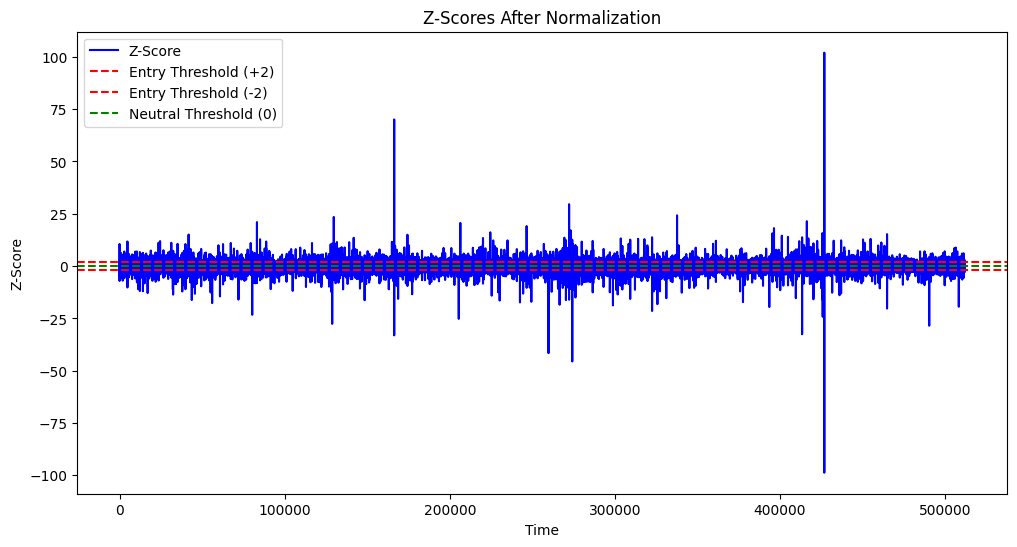

In [105]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Z_Score'], label='Z-Score', color='blue')
plt.axhline(2, color='red', linestyle='--', label='Entry Threshold (+2)')
plt.axhline(-2, color='red', linestyle='--', label='Entry Threshold (-2)')
plt.axhline(0, color='green', linestyle='--', label='Neutral Threshold (0)')
plt.title("Z-Scores After Normalization")
plt.xlabel("Time")
plt.ylabel("Z-Score")
plt.legend()
plt.show()


In [106]:
from statsmodels.robust.scale import mad

# Calculate MAD and median of residuals
median_residual = df['Residual_normalized'].median()
mad_residual = mad(df['Residual_normalized'])

# Calculate robust Z-Score
df['Z_Score_MAD'] = (df['Residual_normalized'] - median_residual) / (1.4826 * mad_residual)

# Print summary
print("Median of Residuals:", median_residual)
print("MAD of Residuals:", mad_residual)


Median of Residuals: -0.00024781684002553187
MAD of Residuals: 0.18742046583629599


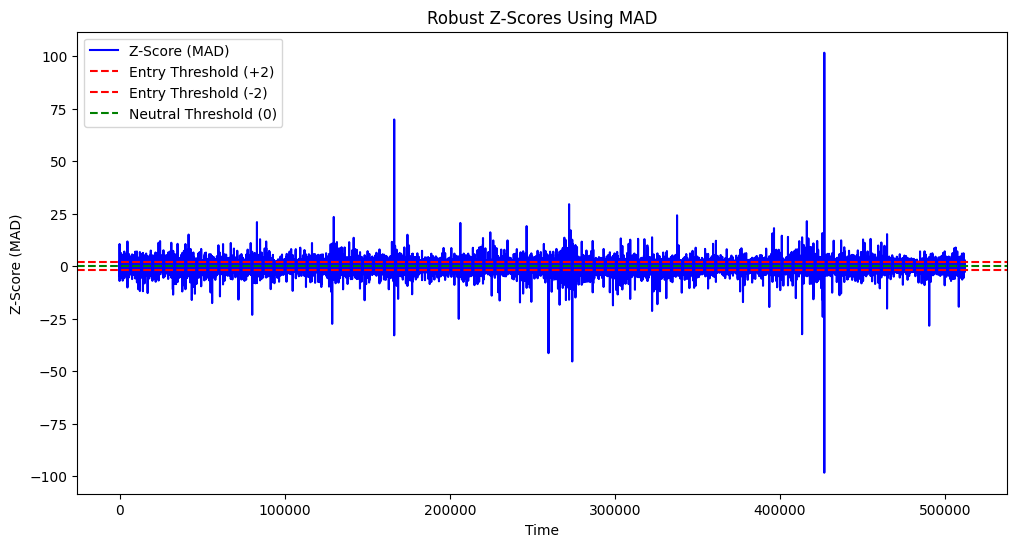

In [107]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Z_Score_MAD'], label='Z-Score (MAD)', color='blue')
plt.axhline(2, color='red', linestyle='--', label='Entry Threshold (+2)')
plt.axhline(-2, color='red', linestyle='--', label='Entry Threshold (-2)')
plt.axhline(0, color='green', linestyle='--', label='Neutral Threshold (0)')
plt.title("Robust Z-Scores Using MAD")
plt.xlabel("Time")
plt.ylabel("Z-Score (MAD)")
plt.legend()
plt.show()


In [108]:
from scipy.stats.mstats import winsorize

# Winsorize residuals at 1% and 99% to limit outliers
df['Residual_winsorized'] = winsorize(df['Residual_normalized'], limits=[0.01, 0.01])

# Calculate Z-Score after Winsorization
mean_residual = df['Residual_winsorized'].mean()
std_residual = df['Residual_winsorized'].std()
df['Z_Score_Winsorized'] = (df['Residual_winsorized'] - mean_residual) / std_residual

print("Mean of Winsorized Residuals:", mean_residual)
print("Standard Deviation of Winsorized Residuals:", std_residual)


Mean of Winsorized Residuals: 0.00027952902358559825
Standard Deviation of Winsorized Residuals: 0.23360417436391837


In [ ]:
# Generate signals using updated thresholds
df['Signal'] = 0
df.loc[df['Z_Score_Winsorized'] > 3, 'Signal'] = -1  # Short Residual
df.loc[df['Z_Score_Winsorized'] < -3, 'Signal'] = 1  # Long Residual
df.loc[abs(df['Z_Score_Winsorized']) < 1, 'Signal'] = 0  # Exit Trade

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test on residuals
result = adfuller(df['Residual_winsorized'].dropna())
print("ADF Statistic:", result[0])
print("p-value:", result[1])
if result[1] < 0.05:
    print("Residuals are stationary. Mean-reverting behavior is confirmed.")
else:
    print("Residuals are not stationary. Mean-reverting assumption fails.")


ADF Statistic: -128.2330793320652
p-value: 0.0
Residuals are stationary. Mean-reverting behavior is confirmed.


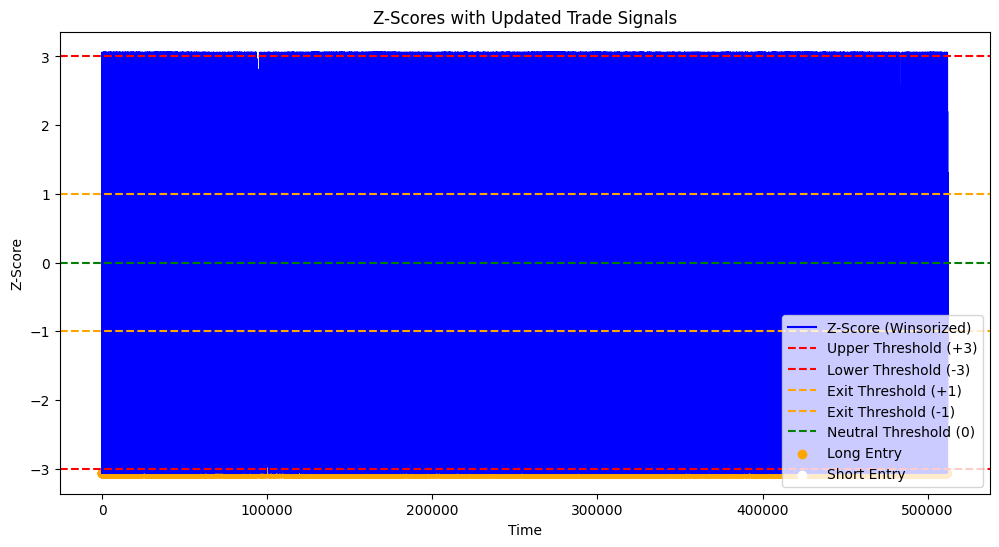

In [112]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Z_Score_Winsorized'], label='Z-Score (Winsorized)', color='blue')
plt.axhline(3, color='red', linestyle='--', label='Upper Threshold (+3)')
plt.axhline(-3, color='red', linestyle='--', label='Lower Threshold (-3)')
plt.axhline(1, color='orange', linestyle='--', label='Exit Threshold (+1)')
plt.axhline(-1, color='orange', linestyle='--', label='Exit Threshold (-1)')
plt.axhline(0, color='green', linestyle='--', label='Neutral Threshold (0)')
plt.scatter(df.index[df['Signal'] == 1], df['Z_Score_Winsorized'][df['Signal'] == 1], color='orange', label='Long Entry')
plt.scatter(df.index[df['Signal'] == -1], df['Z_Score_Winsorized'][df['Signal'] == -1], color='white', label='Short Entry')
plt.title("Z-Scores with Updated Trade Signals")
plt.xlabel("Time")
plt.ylabel("Z-Score")
plt.legend()
plt.show()


In [113]:
def count_trades(signals):
    """
    Count the number of trades triggered by entry and exit signals.

    Parameters:
    - signals: List or Series of trade signals (1, -1, 0).

    Returns:
    - num_trades: Total number of trades executed.
    """
    in_trade = False
    num_trades = 0

    for signal in signals:
        if not in_trade and signal != 0:  # Entry signal
            in_trade = True
            num_trades += 1
        elif in_trade and signal == 0:  # Exit signal
            in_trade = False

    return num_trades

# Apply the function to the Signal column
num_trades = count_trades(df['Signal'])
print(f"Total number of trades triggered: {num_trades}")


Total number of trades triggered: 8693


In [117]:
# Generate trade signals
df['Signal'] = 0
df.loc[df['Z_Score'] > 2, 'Signal'] = 1  # Short Residual
df.loc[df['Z_Score'] < -2, 'Signal'] = -1  # Long Residual
df.loc[abs(df['Z_Score']) < 0.5, 'Signal'] = 0  # Exit Trade


In [118]:
df.head()

,TIMESTAMP,MIC,FEEDCODE,LAST_PRICE_HSI,TURNOVER_VALUE,TURNOVER_VOLUME_HSI,LAST_BID_PRICE_HSI,LAST_ASK_PRICE_HSI,LAST_BID_VOLUME_HSI,LAST_ASK_VOLUME_HSI,...,LOG_RETURNS_HSI_normalized,LOG_RETURNS_HHI_normalized,Residual_normalized,Z_Score,Z_Score_MAD,Residual_winsorized,Z_Score_Winsorized,Signal,PnL,Cumulative_PnL
0,2021-01-04 09:17:00+08:00,XHKF,HSIF1,27145.0,613282200.0,452.0,27145.0,27147.0,3.0,2.0,...,0.353202,0.156696,0.202629,0.731964,0.730117,0.202629,0.866209,0,0.0,0.0
1,2021-01-04 09:18:00+08:00,XHKF,HSIF1,27140.0,502210600.0,370.0,27140.0,27143.0,2.0,2.0,...,-0.315761,-0.309153,-0.018690,-0.067513,-0.066369,-0.018690,-0.081202,0,0.0,0.0
2,2021-01-04 09:19:00+08:00,XHKF,HSIF1,27133.0,397653950.0,293.0,27132.0,27135.0,3.0,4.0,...,-0.562350,-0.697581,0.107969,0.390019,0.389451,0.107969,0.460991,0,0.0,0.0
3,2021-01-04 09:20:00+08:00,XHKF,HSIF1,27127.0,644180250.0,475.0,27126.0,27128.0,1.0,3.0,...,-0.456822,0.700416,-0.713968,-4.081441,-4.065280,-0.713968,-3.057512,-1,0.0,0.0
4,2021-01-04 09:21:00+08:00,XHKF,HSIF1,27132.0,424517350.0,313.0,27127.0,27130.0,2.0,2.0,...,0.106802,0.311989,-0.192994,-0.697157,-0.693657,-0.192994,-0.827355,0,0.0,0.0


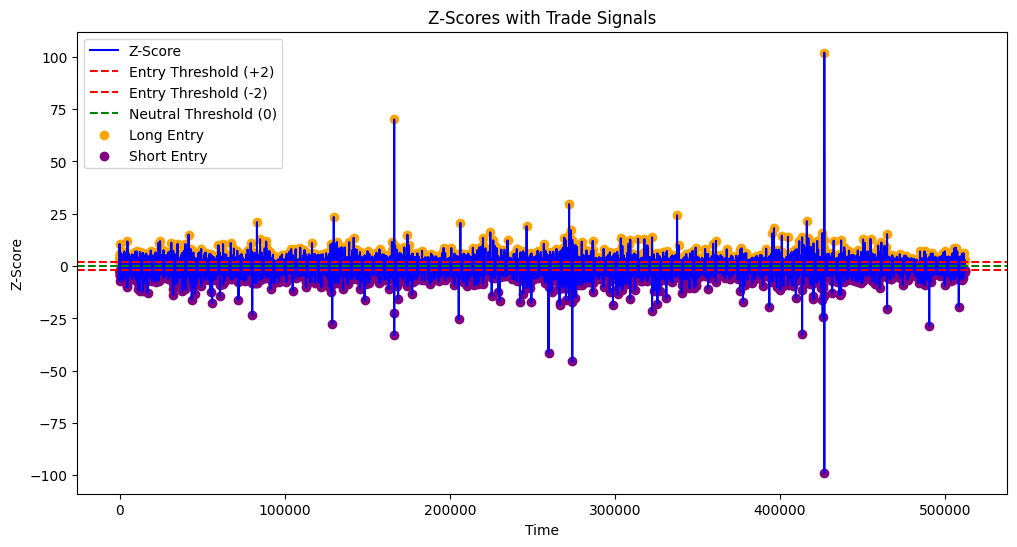

In [119]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Z_Score'], label='Z-Score', color='blue')
plt.axhline(2, color='red', linestyle='--', label='Entry Threshold (+2)')
plt.axhline(-2, color='red', linestyle='--', label='Entry Threshold (-2)')
plt.axhline(0, color='green', linestyle='--', label='Neutral Threshold (0)')
plt.scatter(df.index[df['Signal'] == 1], df['Z_Score'][df['Signal'] == 1], color='orange', label='Long Entry')
plt.scatter(df.index[df['Signal'] == -1], df['Z_Score'][df['Signal'] == -1], color='purple', label='Short Entry')
plt.title("Z-Scores with Trade Signals")
plt.xlabel("Time")
plt.ylabel("Z-Score")
plt.legend()
plt.show()


In [120]:
# Initialize variables
cumulative_pnl = 0.0
position = 0  # +1 = Long HSI/Short HHI, -1 = Short HSI/Long HHI
entry_price_hsi = 0
entry_price_hhi = 0
transaction_cost = 0.01  # 1% transaction cost

df['PnL'] = 0.0
df['Cumulative_PnL'] = 0.0

In [122]:
# Initialize variables
cumulative_pnl = 0.0
position = 0  # 1 = Long HSI/Short HHI, -1 = Short HSI/Long HHI, 0 = no position
entry_price_hsi = 0.0
entry_price_hhi = 0.0
transaction_cost = 0.01  # 1 cent
df['PnL'] = 0.0  # Trade-by-trade PnL
df['Cumulative_PnL'] = 0.0  # Running PnL

# Trade execution loop
for i, row in df.iterrows():
    signal = row['Signal']
    ask_hsi, bid_hsi = row['LAST_ASK_PRICE_HSI'], row['LAST_BID_PRICE_HSI']
    ask_hhi, bid_hhi = row['LAST_ASK_PRICE_HHI'], row['LAST_BID_PRICE_HHI']

    if signal == 1 and position == 0:  # Entry: no active position
        if row['Z_Score'] > 2:  # Short HSI, Long HHI
            position = -1
            entry_price_hsi = bid_hsi  # Short: sell at bid price
            entry_price_hhi = ask_hhi  # Long: buy at ask price
        elif row['Z_Score'] < -2:  # Long HSI, Short HHI
            position = 1
            entry_price_hsi = ask_hsi  # Long: buy at ask price
            entry_price_hhi = bid_hhi  # Short: sell at bid price

    elif signal == -1 and position != 0:  # Exit: active position
        if position == 1:  # Close Long HSI, Short HHI
            exit_price_hsi = bid_hsi  # Sell HSI at bid
            exit_price_hhi = ask_hhi  # Buy HHI at ask
        elif position == -1:  # Close Short HSI, Long HHI
            exit_price_hsi = ask_hsi  # Buy HSI at ask
            exit_price_hhi = bid_hhi  # Sell HHI at bid

        # Calculate PnL for HSI and HHI
        pnl_hsi = position * (exit_price_hsi - entry_price_hsi)
        pnl_hhi = -position * (exit_price_hhi - entry_price_hhi)
        trade_pnl = pnl_hsi + pnl_hhi

        # Subtract transaction costs
        trade_pnl -= transaction_cost

        # Update cumulative PnL
        cumulative_pnl += trade_pnl
        df.loc[i, 'PnL'] = trade_pnl
        df.loc[i, 'Cumulative_PnL'] = cumulative_pnl

        # Reset position
        position = 0
        entry_price_hsi = 0.0
        entry_price_hhi = 0.0

    else:
        # Carry forward the cumulative PnL
        df.loc[i, 'Cumulative_PnL'] = cumulative_pnl


In [123]:
print(df[['Z_Score', 'Signal', 'LAST_BID_PRICE_HSI', 'LAST_ASK_PRICE_HSI', 
          'LAST_BID_PRICE_HHI', 'LAST_ASK_PRICE_HHI', 'PnL', 'Cumulative_PnL']].head(20))


      Z_Score  Signal  LAST_BID_PRICE_HSI  LAST_ASK_PRICE_HSI  \
0    0.731964       0             27145.0             27147.0   
1   -0.067513       0             27140.0             27143.0   
2    0.390019       0             27132.0             27135.0   
3   -4.081441      -1             27126.0             27128.0   
4   -0.697157       0             27127.0             27130.0   
5    0.590378       0             27133.0             27135.0   
6   -1.033757       0             27130.0             27132.0   
7   -1.750975       0             27139.0             27141.0   
8   -0.214294       0             27163.0             27164.0   
9    5.596770       1             27175.0             27177.0   
10   0.074154       0             27170.0             27172.0   
11   0.993879       0             27167.0             27168.0   
12  -0.112899       0             27165.0             27167.0   
13  -1.960089       0             27170.0             27172.0   
14  10.567475       1    

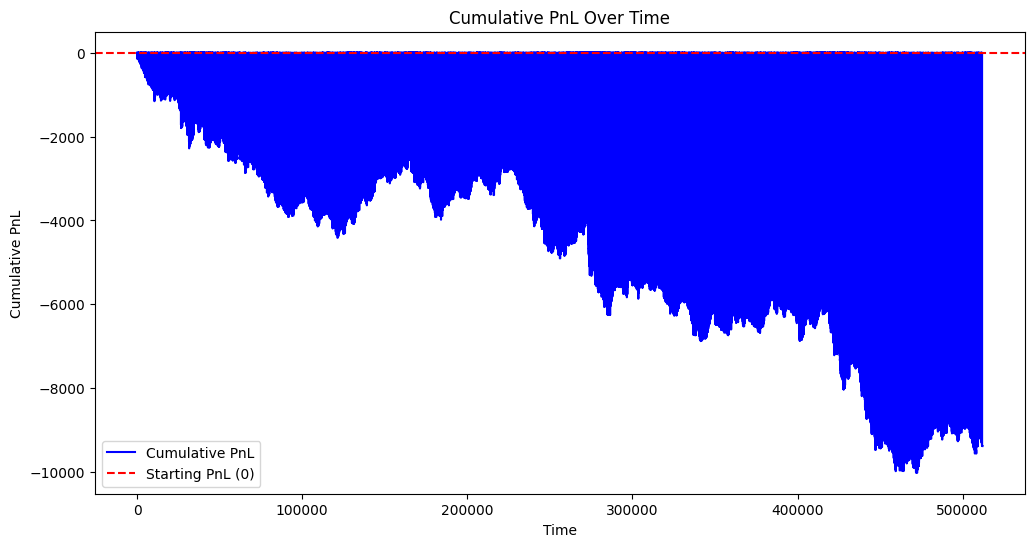

In [124]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Cumulative_PnL'], label='Cumulative PnL', color='blue')
plt.axhline(0, color='red', linestyle='--', label='Starting PnL (0)')
plt.title("Cumulative PnL Over Time")
plt.xlabel("Time")
plt.ylabel("Cumulative PnL")
plt.legend()
plt.show()


In [ ]:

def count_trades(z_scores, entry_threshold=2, exit_threshold=0.5):
    """
    Count the number of trades based on Z-Score deviations.
    
    Parameters:
    - z_scores: List or Series of Z-Scores.
    - entry_threshold: Z-Score threshold for entering trades (default=2).
    - exit_threshold: Z-Score threshold for exiting trades (default=0.5).
    
    Returns:
    - num_trades: Total number of trades executed.
    """
    in_trade = False
    num_trades = 0

    for z in z_scores:
        if not in_trade:
            # Enter trade
            if z > entry_threshold or z < -entry_threshold:
                in_trade = True
                num_trades += 1
        else:
            # Exit trade
            if abs(z) < exit_threshold:
                in_trade = False

    return num_trades


In [42]:
# Calculate the number of trades
z_scores = df['Z_Score']
num_trades = count_trades(z_scores)

print(f"Total number of trades executed: {num_trades}")


Total number of trades executed: 12910


In [ ]:
# Add columns to mark trade signals
df['Entry'] = np.where((df['Z_Score'] > 2) | (df['Z_Score'] < -2), df['Z_Score'], 0)
df['Exit'] = np.where(abs(df['Z_Score']) < 0.5, df['Z_Score'], 0)

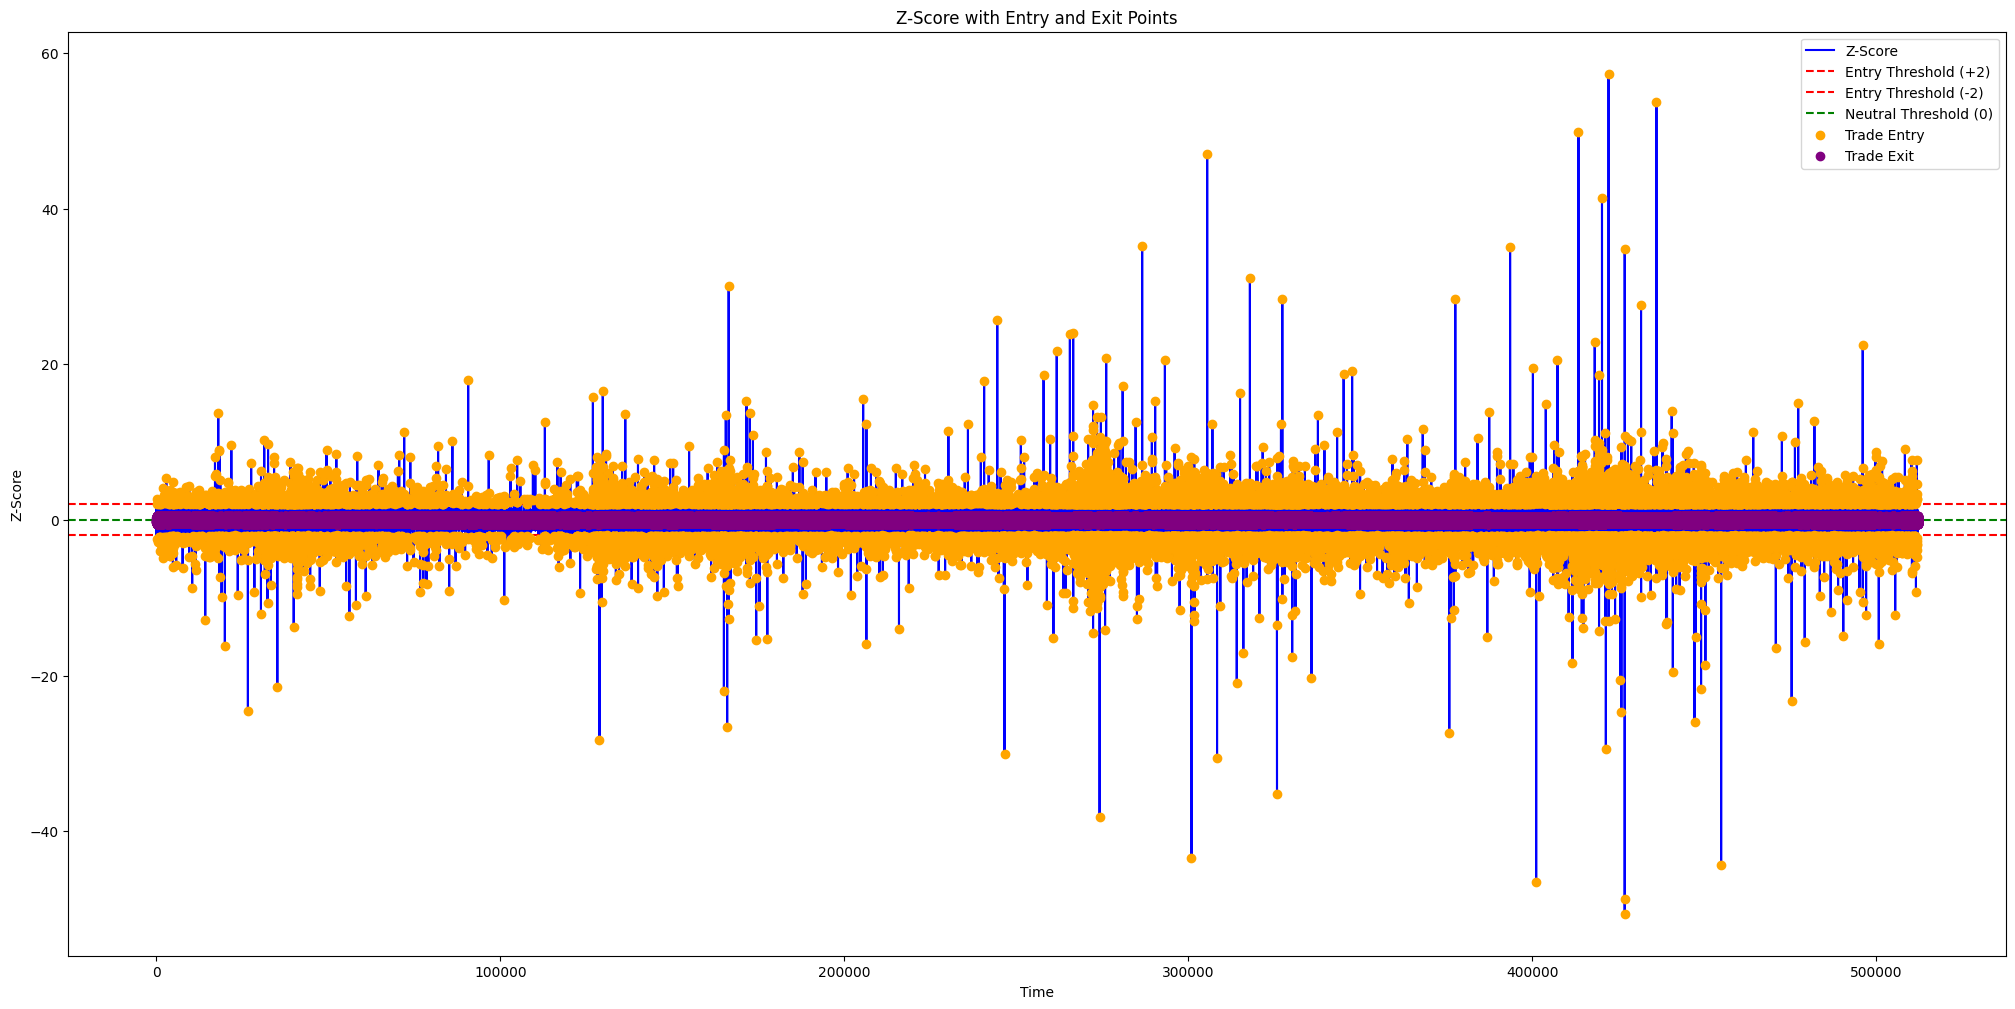

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 12))

# Plot Z-Score
plt.plot(df.index, df['Z_Score'], label='Z-Score', color='blue')
plt.axhline(2, color='red', linestyle='--', label='Entry Threshold (+2)')
plt.axhline(-2, color='red', linestyle='--', label='Entry Threshold (-2)')
plt.axhline(0, color='green', linestyle='--', label='Neutral Threshold (0)')

# Mark entry points
plt.scatter(df.index, df['Entry'], color='orange', label='Trade Entry', zorder=5)

# Mark exit points
plt.scatter(df.index, df['Exit'], color='purple', label='Trade Exit', zorder=5)

# Labels and legend
plt.title("Z-Score with Entry and Exit Points")
plt.xlabel("Time")
plt.ylabel("Z-Score")
plt.legend()
plt.show()


In [41]:
df

,TIMESTAMP,MIC,FEEDCODE,LAST_PRICE_HSI,TURNOVER_VALUE,TURNOVER_VOLUME_HSI,LAST_BID_PRICE_HSI,LAST_ASK_PRICE_HSI,LAST_BID_VOLUME_HSI,LAST_ASK_VOLUME_HSI,...,LOG_RETURNS_HHI,LOG_RETURNS_HSI,predicted_HSI,LOG_RETURNS_HHI_scaled,predicted_RLM,Residual,Z_Score,Signal,Entry,Exit
0,2021-01-04 09:17:00+08:00,XHKF,HSIF1,27145.0,613282200.0,452.0,27145.0,27147.0,3.0,2.0,...,0.000094,0.000184,7.834336e-05,0.162590,7.874655e-05,-0.149886,-0.156585,Hold,NaN,-0.156585
1,2021-01-04 09:18:00+08:00,XHKF,HSIF1,27140.0,502210600.0,370.0,27140.0,27143.0,2.0,2.0,...,-0.000188,-0.000166,-1.564866e-04,-0.320621,-1.567219e-04,0.295768,0.309143,Hold,NaN,0.309143
2,2021-01-04 09:19:00+08:00,XHKF,HSIF1,27133.0,397653950.0,293.0,27132.0,27135.0,3.0,4.0,...,-0.000422,-0.000295,-3.522887e-04,-0.723525,-3.530564e-04,0.667519,0.697640,Hold,NaN,NaN
3,2021-01-04 09:20:00+08:00,XHKF,HSIF1,27127.0,644180250.0,475.0,27126.0,27128.0,1.0,3.0,...,0.000422,-0.000240,3.524270e-04,0.726574,3.535754e-04,-0.670867,-0.701034,Hold,NaN,NaN
4,2021-01-04 09:21:00+08:00,XHKF,HSIF1,27132.0,424517350.0,313.0,27127.0,27130.0,2.0,2.0,...,0.000188,0.000055,1.566249e-04,0.323670,1.572409e-04,-0.298692,-0.312094,Hold,NaN,-0.312094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512037,2023-03-29 02:33:00+08:00,XHKF,HSIH3,20133.0,11072050.0,11.0,20133.0,20135.0,1.0,3.0,...,0.000582,0.000323,4.857394e-04,1.000892,4.872503e-04,-0.923500,-0.965046,Hold,NaN,NaN
512038,2023-03-29 02:34:00+08:00,XHKF,HSIH3,20127.0,10066250.0,10.0,20129.0,20132.0,3.0,3.0,...,-0.000073,-0.000174,-6.062417e-05,-0.123365,-6.059883e-05,0.113692,0.118866,Hold,NaN,0.118866
512039,2023-03-29 02:35:00+08:00,XHKF,HSIH3,20131.0,2013100.0,2.0,20131.0,20133.0,5.0,2.0,...,0.000000,0.000075,6.915081e-08,0.001524,2.595210e-07,-0.001333,-0.001340,Hold,NaN,-0.001340
512040,2023-03-29 02:36:00+08:00,XHKF,HSIH3,20133.0,10066400.0,10.0,20128.0,20131.0,2.0,2.0,...,-0.000145,-0.000124,-1.213307e-04,-0.248281,-1.214705e-04,0.229039,0.239409,Hold,NaN,0.239409


In [ ]:
# Parameters
starting_capital = 100000
transaction_cost = 0.01  # 1% transaction cost
cumulative_pnl = 0.0
position_hsi = 0  # Tracks position for HSI (+1 for long, -1 for short, 0 for no position)
position_hhi = 0  # Tracks position for HHI
entry_price_hsi = 0
entry_price_hhi = 0

# Add columns for PnL and trade tracking
df['PnL'] = 0.0
df['Cumulative_PnL'] = 0.0

In [23]:
# Initialize variables
cumulative_pnl = 0.0
position = 0  # +1 for long, -1 for short, 0 for no position
entry_price = 0
transaction_cost = 0.01  # 1% per trade
df['PnL'] = 0.0  # Row-by-row PnL for visualization

# Iterate through rows to simulate trades
for i, row in df.iterrows():
    z_score = row['Z_Score']
    residual = row['Residual']
    
    if position == 0:  # Looking to enter a trade
        if z_score > 2:  # Short HSI, Long HHI
            position = -1
            entry_price = residual
        elif z_score < -2:  # Long HSI, Short HHI
            position = 1
            entry_price = residual
    elif position != 0:  # Already in a trade, look to exit
        if abs(z_score) < 0.5:  # Exit trade
            # Calculate trade PnL
            exit_price = residual
            trade_return = position * (entry_price - exit_price)
            trade_pnl = trade_return - 2 * transaction_cost  # Subtract transaction costs (entry + exit)

            # Update cumulative PnL
            cumulative_pnl += trade_pnl

            # Record PnL for this row
            df.loc[i, 'PnL'] = cumulative_pnl

            # Reset position
            position = 0
        else:
            # Carry forward the last cumulative PnL
            df.loc[i, 'PnL'] = cumulative_pnl
    else:
        # Carry forward the last cumulative PnL for rows without trades
        df.loc[i, 'PnL'] = cumulative_pnl


In [26]:
df

,TIMESTAMP,MIC,FEEDCODE,LAST_PRICE_HSI,TURNOVER_VALUE,TURNOVER_VOLUME_HSI,LAST_BID_PRICE_HSI,LAST_ASK_PRICE_HSI,LAST_BID_VOLUME_HSI,LAST_ASK_VOLUME_HSI,...,LOG_RETURNS_HSI,predicted_HSI,LOG_RETURNS_HHI_scaled,predicted_RLM,Residual,Z_Score,Signal,Entry,Exit,PnL
0,2021-01-04 09:17:00+08:00,XHKF,HSIF1,27145.0,613282200.0,452.0,27145.0,27147.0,3.0,2.0,...,0.000184,7.834336e-05,0.162590,7.874655e-05,-0.150211,-0.156585,Hold,NaN,-0.156585,0.0
1,2021-01-04 09:18:00+08:00,XHKF,HSIF1,27140.0,502210600.0,370.0,27140.0,27143.0,2.0,2.0,...,-0.000166,-1.564866e-04,-0.320621,-1.567219e-04,0.296409,0.309143,Hold,NaN,0.309143,0.0
2,2021-01-04 09:19:00+08:00,XHKF,HSIF1,27133.0,397653950.0,293.0,27132.0,27135.0,3.0,4.0,...,-0.000295,-3.522887e-04,-0.723525,-3.530564e-04,0.668966,0.697639,Hold,NaN,NaN,0.0
3,2021-01-04 09:20:00+08:00,XHKF,HSIF1,27127.0,644180250.0,475.0,27126.0,27128.0,1.0,3.0,...,-0.000240,3.524270e-04,0.726574,3.535754e-04,-0.672320,-0.701032,Hold,NaN,NaN,0.0
4,2021-01-04 09:21:00+08:00,XHKF,HSIF1,27132.0,424517350.0,313.0,27127.0,27130.0,2.0,2.0,...,0.000055,1.566249e-04,0.323670,1.572409e-04,-0.299340,-0.312094,Hold,NaN,-0.312094,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512037,2023-03-29 02:33:00+08:00,XHKF,HSIH3,20133.0,11072050.0,11.0,20133.0,20135.0,1.0,3.0,...,0.000323,4.857394e-04,1.000892,4.872503e-04,-0.925502,-0.965046,Hold,NaN,NaN,0.0
512038,2023-03-29 02:34:00+08:00,XHKF,HSIH3,20127.0,10066250.0,10.0,20129.0,20132.0,3.0,3.0,...,-0.000174,-6.062417e-05,-0.123365,-6.059883e-05,0.113938,0.118866,Hold,NaN,0.118866,0.0
512039,2023-03-29 02:35:00+08:00,XHKF,HSIH3,20131.0,2013100.0,2.0,20131.0,20133.0,5.0,2.0,...,0.000075,6.915081e-08,0.001524,2.595210e-07,-0.001336,-0.001340,Hold,NaN,-0.001340,0.0
512040,2023-03-29 02:36:00+08:00,XHKF,HSIH3,20133.0,10066400.0,10.0,20128.0,20131.0,2.0,2.0,...,-0.000124,-1.213307e-04,-0.248281,-1.214705e-04,0.229536,0.239409,Hold,NaN,0.239409,0.0


In [24]:
plt.figure(figsize=(12, 6))
plt.plot(df.index[:len(cumulative_pnl)], cumulative_pnl, label='Cumulative PnL', color='blue')
plt.title('Cumulative PnL')
plt.xlabel('Time')
plt.ylabel('Cumulative PnL')
plt.axhline(starting_capital, color='red', linestyle='--', label='Starting Capital')
plt.legend()
plt.show()


TypeError: object of type 'float' has no len()

<Figure size 1200x600 with 0 Axes>

In [25]:
# Drawdown
cumulative_pnl = pd.Series([starting_capital] + pnl).cumsum()
rolling_max = cumulative_pnl.cummax()
drawdown = (rolling_max - cumulative_pnl).max()

# Sharpe Ratio
import numpy as np

average_return = np.mean(returns)
std_dev_return = np.std(returns)
sharpe_ratio = average_return / std_dev_return

# Results
print(f"Total PnL: ${capital - starting_capital:.2f}")
print(f"Maximum Drawdown: ${drawdown:.2f}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")


Total PnL: $nan
Maximum Drawdown: $inf
Sharpe Ratio: nan


c:\Program Files\Python311\Lib\site-packages\numpy\_core\fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
